# Big Data in Astronomy - Project <br>
Jelena Jelenkovic

In [85]:
##imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys
import seaborn as sns
import yaml
#!pip install pyarrow
import pyarrow.parquet as pq

import datashader as ds
import datashader.transfer_functions as tf
from datashader.mpl_ext import dsshow

pd.set_option('display.max_columns', 999)

In [4]:
data_dir = "C:/Users/HP EliteBook 840 G3/Desktop/astro projekat/"

In [5]:
#TASK 1: Reading the datasets: Object, Source and ForcedSource

In [7]:
object_df = pd.read_parquet(os.path.join(data_dir, 'ObjectTable.parquet'))
object_df.head(5)

,ra,dec,psPm_ra,psPm_dec,psParallax,psFlux_u,psFlux_g,psFlux_r,psFlux_i,psFlux_z,psFlux_y,psFluxErr_u,psFluxErr_g,psFluxErr_r,psFluxErr_i,psFluxErr_z,psFluxErr_y,bdFlux_u,bdFlux_g,bdFlux_r,bdFlux_i,bdFlux_z,bdFlux_y,bdFluxErr_u,bdFluxErr_g,bdFluxErr_r,bdFluxErr_i,bdFluxErr_z,bdFluxErr_y,psMag_u,psMag_g,psMag_r,psMag_i,psMag_z,psMag_y,psMagErr_u,psMagErr_g,psMagErr_r,psMagErr_i,psMagErr_z,psMagErr_y,bdMag_u,bdMag_g,bdMag_r,bdMag_i,bdMag_z,bdMag_y,bdMagErr_u,bdMagErr_g,bdMagErr_r,bdMagErr_i,bdMagErr_z,bdMagErr_y,extendedness_u,extendedness_g,extendedness_r,extendedness_i,extendedness_z,extendedness_y,stdColor_0,stdColor_1,stdColor_2,stdColor_3,stdColor_4,stdColorErr_0,stdColorErr_1,stdColorErr_2,stdColorErr_3,stdColorErr_4,class,photoZ_pest,z,flags_u,flags_g,flags_r,flags_i,flags_z,flags_y,spec_fiberid,spec_plate,spec_mjd,lcPeriodic[0]_g,lcPeriodic[0]_r,lcPeriodic[0]_i,lcPeriodic[1]_g,lcPeriodic[1]_r,lcPeriodic[1]_i,lcPeriodic[2]_g,lcPeriodic[2]_r,lcPeriodic[2]_i,lcPeriodic[3]_g,lcPeriodic[3]_r,lcPeriodic[3]_i,lcPeriodic[4]_u,lcPeriodic[4]_g,lcPeriodic[4]_r,lcPeriodic[4]_i,lcPeriodic[4]_z,lcPeriodic[5]_u,lcPeriodic[5]_g,lcPeriodic[5]_r,lcPeriodic[5]_i,lcPeriodic[5]_z,lcPeriodic[6]_u,lcPeriodic[6]_g,lcPeriodic[6]_r,lcPeriodic[6]_i,lcPeriodic[6]_z,lcPeriodic[7]_u,lcPeriodic[7]_g,lcPeriodic[7]_r,lcPeriodic[7]_i,lcPeriodic[7]_z,lcPeriodic[8]_u,lcPeriodic[8]_g,lcPeriodic[8]_r,lcPeriodic[8]_i,lcPeriodic[8]_z,lcPeriodic[9]_u,lcPeriodic[9]_g,lcPeriodic[9]_r,lcPeriodic[9]_i,lcPeriodic[9]_z,lcPeriodic[10]_u,lcPeriodic[10]_g,lcPeriodic[10]_r,lcPeriodic[10]_i,lcPeriodic[10]_z,lcPeriodic[11]_u,lcPeriodic[11]_g,lcPeriodic[11]_r,lcPeriodic[11]_i,lcPeriodic[11]_z,lcPeriodic[12]_u,lcPeriodic[12]_g,lcPeriodic[12]_r,lcPeriodic[12]_i,lcPeriodic[12]_z,lcPeriodic[13]_u,lcPeriodic[13]_g,lcPeriodic[13]_r,lcPeriodic[13]_i,lcPeriodic[13]_z,lcPeriodic[14]_u,lcPeriodic[14]_g,lcPeriodic[14]_r,lcPeriodic[14]_i,lcPeriodic[14]_z,lcPeriodic[15]_u,lcPeriodic[15]_g,lcPeriodic[15]_r,lcPeriodic[15]_i,lcPeriodic[15]_z,lcPeriodic[16]_u,lcPeriodic[16]_g,lcPeriodic[16]_r,lcPeriodic[16]_i,lcPeriodic[16]_z,lcPeriodic[17]_u,lcPeriodic[17]_g,lcPeriodic[17]_r,lcPeriodic[17]_i,lcPeriodic[17]_z,lcPeriodic[18]_u,lcPeriodic[18]_g,lcPeriodic[18]_r,lcPeriodic[18]_i,lcPeriodic[18]_z,lcPeriodic[19]_u,lcPeriodic[19]_g,lcPeriodic[19]_r,lcPeriodic[19]_i,lcPeriodic[19]_z,lcPeriodic[20]_u,lcPeriodic[20]_g,lcPeriodic[20]_r,lcPeriodic[20]_i,lcPeriodic[20]_z,lcPeriodic[21]_u,lcPeriodic[21]_g,lcPeriodic[21]_r,lcPeriodic[21]_i,lcPeriodic[21]_z,lcPeriodic[22]_u,lcPeriodic[22]_g,lcPeriodic[22]_r,lcPeriodic[22]_i,lcPeriodic[22]_z,lcPeriodic[23]_u,lcPeriodic[23]_g,lcPeriodic[23]_r,lcPeriodic[23]_i,lcPeriodic[23]_z,lcPeriodic[24]_u,lcPeriodic[24]_g,lcPeriodic[24]_r,lcPeriodic[24]_i,lcPeriodic[24]_z,lcPeriodic[25]_u,lcPeriodic[25]_g,lcPeriodic[25]_r,lcPeriodic[25]_i,lcPeriodic[25]_z,lcPeriodic[26]_u,lcPeriodic[26]_g,lcPeriodic[26]_r,lcPeriodic[26]_i,lcPeriodic[26]_z,lcPeriodic[27]_u,lcPeriodic[27]_g,lcPeriodic[27]_r,lcPeriodic[27]_i,lcPeriodic[27]_z,lcPeriodic[28]_u,lcPeriodic[28]_g,lcPeriodic[28]_r,lcPeriodic[28]_i,lcPeriodic[28]_z,lcPeriodic[29]_u,lcPeriodic[29]_g,lcPeriodic[29]_r,lcPeriodic[29]_i,lcPeriodic[29]_z,lcPeriodic[30]_u,lcPeriodic[30]_g,lcPeriodic[30]_r,lcPeriodic[30]_i,lcPeriodic[30]_z,lcPeriodic[31]_u,lcPeriodic[31]_g,lcPeriodic[31]_r,lcPeriodic[31]_i,lcPeriodic[31]_z,lcPeriodic[32]_u,lcPeriodic[32]_g,lcPeriodic[32]_r,lcPeriodic[32]_i,lcPeriodic[32]_z,lcNonPeriodic[0]_u,lcNonPeriodic[0]_g,lcNonPeriodic[0]_r,lcNonPeriodic[0]_i,lcNonPeriodic[0]_z,lcNonPeriodic[1]_u,lcNonPeriodic[1]_g,lcNonPeriodic[1]_r,lcNonPeriodic[1]_i,lcNonPeriodic[1]_z,lcNonPeriodic[2]_u,lcNonPeriodic[2]_g,lcNonPeriodic[2]_r,lcNonPeriodic[2]_i,lcNonPeriodic[2]_z,lcNonPeriodic[3]_u,lcNonPeriodic[3]_g,lcNonPeriodic[3]_r,lcNonPeriodic[3]_i,lcNonPeriodic[3]_z,lcNonPeriodic[4]_u,lcNonPeriodic[4]_g,lcNonPeriodic[4]_r,lcNonPeriodic[4]_i,lcNonPeriodic[4]_z,lcNonPeriodic[5]_u,lcNonPeriodic[5]_g,lcNonPeriodic[5]_r,lcNonPeri

In [9]:
source_df = pd.read_parquet(os.path.join(data_dir, 'SourceTable.parquet'))
source_df.head(5)

,objectId,ra,dec,psFlux,psFluxErr,bdFlux,bdFluxErr,psMag,psMagErr,bdMag,bdMagErr,extendedness,flags,filter
sourceId,,,,,,,,,,,,,,
0000000,1247442,37.121232,-4.411258,34784.859130,925.331890,33868.834268,1362.374582,20.046590,0.028505,20.075565,0.042818,0.104671,0.0,5
0000001,1247442,37.121232,-4.411258,13388.275757,129.020519,13255.259943,260.002448,21.083254,0.010413,21.094095,0.021091,0.028308,0.0,3
0000002,1247442,37.121292,-4.411262,-372.793902,900.750786,6648.484648,3639.775297,NaN,NaN,21.797410,0.588044,1.000000,0.0,0
0000003,1247442,37.121232,-4.411258,2130.254292,74.515577,2264.923036,145.867961,23.078987,0.037330,23.012432,0.067765,0.700317,0.0,2
0000004,1247442,37.121232,-4.411258,28520.363007,271.999652,27716.874087,522.845275,20.262178,0.010306,20.293205,0.020290,0.034582,0.0,4


In [29]:
forced_source_df = pd.read_parquet(os.path.join(data_dir, 'ForcedSourceTable.parquet'))
forced_source_df.head(5)

,objectId,mjd,psMag,psMagErr,flags,psFlux,psFluxErr,psDiffFlux,psDiffFluxErr,filter
0,1377887,52959.13,23.269028,0.442568,9007199422513169,1584.230835,759.312988,839.39703,1350.93301,0
1,1377887,54379.29,NaN,NaN,9007199397347585,-210.056396,1103.294067,-954.89032,1570.26164,0
2,1377887,53674.19,23.163357,0.562635,9007199397380353,1773.329224,1049.915405,1028.49530,1533.22740,0
3,1377887,53352.08,23.761757,0.668242,9007199388958721,875.497925,808.758972,130.66400,1379.33134,0
4,1377887,53638.28,24.019226,1.067474,9007199388960001,585.692871,1122.401855,-159.14105,1583.74548,0


In [12]:
#getting info about all three datasets

In [13]:
object_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 446487 entries, 0271386 to 1468021
Data columns (total 384 columns):
 #    Column               Non-Null Count   Dtype  
---   ------               --------------   -----  
 0    ra                   446487 non-null  float64
 1    dec                  446487 non-null  float64
 2    psPm_ra              440954 non-null  float64
 3    psPm_dec             440954 non-null  float64
 4    psParallax           134086 non-null  float64
 5    psFlux_u             383700 non-null  float64
 6    psFlux_g             432777 non-null  float64
 7    psFlux_r             434976 non-null  float64
 8    psFlux_i             434473 non-null  float64
 9    psFlux_z             435338 non-null  float64
 10   psFlux_y             390710 non-null  float64
 11   psFluxErr_u          383700 non-null  float64
 12   psFluxErr_g          432777 non-null  float64
 13   psFluxErr_r          434976 non-null  float64
 14   psFluxErr_i          434473 non-null  float64
 1

In [15]:
forced_source_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48974245 entries, 0 to 48974244
Data columns (total 10 columns):
 #   Column         Non-Null Count     Dtype  
---  ------         --------------     -----  
 0   objectId       48974245 non-null  object 
 1   mjd            48974245 non-null  float64
 2   psMag          48442747 non-null  float32
 3   psMagErr       48442747 non-null  float32
 4   flags          48974245 non-null  int64  
 5   psFlux         48974245 non-null  float32
 6   psFluxErr      48974243 non-null  float32
 7   psDiffFlux     48974245 non-null  float64
 8   psDiffFluxErr  48974243 non-null  float64
 9   filter         48974245 non-null  int64  
dtypes: float32(4), float64(3), int64(2), object(1)
memory usage: 2.9+ GB


In [16]:
source_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1795747 entries, 0000000 to 1798859
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   objectId      1795747 non-null  object 
 1   ra            1795747 non-null  float64
 2   dec           1795747 non-null  float64
 3   psFlux        1790126 non-null  float64
 4   psFluxErr     1790126 non-null  float64
 5   bdFlux        1795507 non-null  float64
 6   bdFluxErr     1795507 non-null  float64
 7   psMag         1747356 non-null  float64
 8   psMagErr      1747356 non-null  float64
 9   bdMag         1749570 non-null  float64
 10  bdMagErr      1749570 non-null  float64
 11  extendedness  1795747 non-null  float64
 12  flags         1795407 non-null  Float64
 13  filter        1795747 non-null  int64  
dtypes: Float64(1), float64(11), int64(1), object(1)
memory usage: 207.2+ MB


In [17]:
# number of rows and columns in each dataset
forced_source_df.shape, source_df.shape , object_df.shape

((48974245, 10), (1795747, 14), (446487, 384))

In [ ]:
#OBJECT TABLE (plots, more info)

In [18]:
object_df.head(5)

,ra,dec,psPm_ra,psPm_dec,psParallax,psFlux_u,psFlux_g,psFlux_r,psFlux_i,psFlux_z,psFlux_y,psFluxErr_u,psFluxErr_g,psFluxErr_r,psFluxErr_i,psFluxErr_z,psFluxErr_y,bdFlux_u,bdFlux_g,bdFlux_r,bdFlux_i,bdFlux_z,bdFlux_y,bdFluxErr_u,bdFluxErr_g,bdFluxErr_r,bdFluxErr_i,bdFluxErr_z,bdFluxErr_y,psMag_u,psMag_g,psMag_r,psMag_i,psMag_z,psMag_y,psMagErr_u,psMagErr_g,psMagErr_r,psMagErr_i,psMagErr_z,psMagErr_y,bdMag_u,bdMag_g,bdMag_r,bdMag_i,bdMag_z,bdMag_y,bdMagErr_u,bdMagErr_g,bdMagErr_r,bdMagErr_i,bdMagErr_z,bdMagErr_y,extendedness_u,extendedness_g,extendedness_r,extendedness_i,extendedness_z,extendedness_y,stdColor_0,stdColor_1,stdColor_2,stdColor_3,stdColor_4,stdColorErr_0,stdColorErr_1,stdColorErr_2,stdColorErr_3,stdColorErr_4,class,photoZ_pest,z,flags_u,flags_g,flags_r,flags_i,flags_z,flags_y,spec_fiberid,spec_plate,spec_mjd,lcPeriodic[0]_g,lcPeriodic[0]_r,lcPeriodic[0]_i,lcPeriodic[1]_g,lcPeriodic[1]_r,lcPeriodic[1]_i,lcPeriodic[2]_g,lcPeriodic[2]_r,lcPeriodic[2]_i,lcPeriodic[3]_g,lcPeriodic[3]_r,lcPeriodic[3]_i,lcPeriodic[4]_u,lcPeriodic[4]_g,lcPeriodic[4]_r,lcPeriodic[4]_i,lcPeriodic[4]_z,lcPeriodic[5]_u,lcPeriodic[5]_g,lcPeriodic[5]_r,lcPeriodic[5]_i,lcPeriodic[5]_z,lcPeriodic[6]_u,lcPeriodic[6]_g,lcPeriodic[6]_r,lcPeriodic[6]_i,lcPeriodic[6]_z,lcPeriodic[7]_u,lcPeriodic[7]_g,lcPeriodic[7]_r,lcPeriodic[7]_i,lcPeriodic[7]_z,lcPeriodic[8]_u,lcPeriodic[8]_g,lcPeriodic[8]_r,lcPeriodic[8]_i,lcPeriodic[8]_z,lcPeriodic[9]_u,lcPeriodic[9]_g,lcPeriodic[9]_r,lcPeriodic[9]_i,lcPeriodic[9]_z,lcPeriodic[10]_u,lcPeriodic[10]_g,lcPeriodic[10]_r,lcPeriodic[10]_i,lcPeriodic[10]_z,lcPeriodic[11]_u,lcPeriodic[11]_g,lcPeriodic[11]_r,lcPeriodic[11]_i,lcPeriodic[11]_z,lcPeriodic[12]_u,lcPeriodic[12]_g,lcPeriodic[12]_r,lcPeriodic[12]_i,lcPeriodic[12]_z,lcPeriodic[13]_u,lcPeriodic[13]_g,lcPeriodic[13]_r,lcPeriodic[13]_i,lcPeriodic[13]_z,lcPeriodic[14]_u,lcPeriodic[14]_g,lcPeriodic[14]_r,lcPeriodic[14]_i,lcPeriodic[14]_z,lcPeriodic[15]_u,lcPeriodic[15]_g,lcPeriodic[15]_r,lcPeriodic[15]_i,lcPeriodic[15]_z,lcPeriodic[16]_u,lcPeriodic[16]_g,lcPeriodic[16]_r,lcPeriodic[16]_i,lcPeriodic[16]_z,lcPeriodic[17]_u,lcPeriodic[17]_g,lcPeriodic[17]_r,lcPeriodic[17]_i,lcPeriodic[17]_z,lcPeriodic[18]_u,lcPeriodic[18]_g,lcPeriodic[18]_r,lcPeriodic[18]_i,lcPeriodic[18]_z,lcPeriodic[19]_u,lcPeriodic[19]_g,lcPeriodic[19]_r,lcPeriodic[19]_i,lcPeriodic[19]_z,lcPeriodic[20]_u,lcPeriodic[20]_g,lcPeriodic[20]_r,lcPeriodic[20]_i,lcPeriodic[20]_z,lcPeriodic[21]_u,lcPeriodic[21]_g,lcPeriodic[21]_r,lcPeriodic[21]_i,lcPeriodic[21]_z,lcPeriodic[22]_u,lcPeriodic[22]_g,lcPeriodic[22]_r,lcPeriodic[22]_i,lcPeriodic[22]_z,lcPeriodic[23]_u,lcPeriodic[23]_g,lcPeriodic[23]_r,lcPeriodic[23]_i,lcPeriodic[23]_z,lcPeriodic[24]_u,lcPeriodic[24]_g,lcPeriodic[24]_r,lcPeriodic[24]_i,lcPeriodic[24]_z,lcPeriodic[25]_u,lcPeriodic[25]_g,lcPeriodic[25]_r,lcPeriodic[25]_i,lcPeriodic[25]_z,lcPeriodic[26]_u,lcPeriodic[26]_g,lcPeriodic[26]_r,lcPeriodic[26]_i,lcPeriodic[26]_z,lcPeriodic[27]_u,lcPeriodic[27]_g,lcPeriodic[27]_r,lcPeriodic[27]_i,lcPeriodic[27]_z,lcPeriodic[28]_u,lcPeriodic[28]_g,lcPeriodic[28]_r,lcPeriodic[28]_i,lcPeriodic[28]_z,lcPeriodic[29]_u,lcPeriodic[29]_g,lcPeriodic[29]_r,lcPeriodic[29]_i,lcPeriodic[29]_z,lcPeriodic[30]_u,lcPeriodic[30]_g,lcPeriodic[30]_r,lcPeriodic[30]_i,lcPeriodic[30]_z,lcPeriodic[31]_u,lcPeriodic[31]_g,lcPeriodic[31]_r,lcPeriodic[31]_i,lcPeriodic[31]_z,lcPeriodic[32]_u,lcPeriodic[32]_g,lcPeriodic[32]_r,lcPeriodic[32]_i,lcPeriodic[32]_z,lcNonPeriodic[0]_u,lcNonPeriodic[0]_g,lcNonPeriodic[0]_r,lcNonPeriodic[0]_i,lcNonPeriodic[0]_z,lcNonPeriodic[1]_u,lcNonPeriodic[1]_g,lcNonPeriodic[1]_r,lcNonPeriodic[1]_i,lcNonPeriodic[1]_z,lcNonPeriodic[2]_u,lcNonPeriodic[2]_g,lcNonPeriodic[2]_r,lcNonPeriodic[2]_i,lcNonPeriodic[2]_z,lcNonPeriodic[3]_u,lcNonPeriodic[3]_g,lcNonPeriodic[3]_r,lcNonPeriodic[3]_i,lcNonPeriodic[3]_z,lcNonPeriodic[4]_u,lcNonPeriodic[4]_g,lcNonPeriodic[4]_r,lcNonPeriodic[4]_i,lcNonPeriodic[4]_z,lcNonPeriodic[5]_u,lcNonPeriodic[5]_g,lcNonPeriodic[5]_r,lcNonPeri

In [19]:
object_df.describe()

,ra,dec,psPm_ra,psPm_dec,psParallax,psFlux_u,psFlux_g,psFlux_r,psFlux_i,psFlux_z,psFlux_y,psFluxErr_u,psFluxErr_g,psFluxErr_r,psFluxErr_i,psFluxErr_z,psFluxErr_y,bdFlux_u,bdFlux_g,bdFlux_r,bdFlux_i,bdFlux_z,bdFlux_y,bdFluxErr_u,bdFluxErr_g,bdFluxErr_r,bdFluxErr_i,bdFluxErr_z,bdFluxErr_y,psMag_u,psMag_g,psMag_r,psMag_i,psMag_z,psMag_y,psMagErr_u,psMagErr_g,psMagErr_r,psMagErr_i,psMagErr_z,psMagErr_y,bdMag_u,bdMag_g,bdMag_r,bdMag_i,bdMag_z,bdMag_y,bdMagErr_u,bdMagErr_g,bdMagErr_r,bdMagErr_i,bdMagErr_z,bdMagErr_y,extendedness_u,extendedness_g,extendedness_r,extendedness_i,extendedness_z,extendedness_y,stdColor_0,stdColor_1,stdColor_2,stdColor_3,stdColor_4,stdColorErr_0,stdColorErr_1,stdColorErr_2,stdColorErr_3,stdColorErr_4,photoZ_pest,z,flags_u,flags_g,flags_r,flags_i,flags_z,flags_y,spec_fiberid,spec_plate,spec_mjd,lcPeriodic[0]_g,lcPeriodic[0]_r,lcPeriodic[0]_i,lcPeriodic[1]_g,lcPeriodic[1]_r,lcPeriodic[1]_i,lcPeriodic[2]_g,lcPeriodic[2]_r,lcPeriodic[2]_i,lcPeriodic[3]_g,lcPeriodic[3]_r,lcPeriodic[3]_i,lcPeriodic[4]_u,lcPeriodic[4]_g,lcPeriodic[4]_r,lcPeriodic[4]_i,lcPeriodic[4]_z,lcPeriodic[5]_u,lcPeriodic[5]_g,lcPeriodic[5]_r,lcPeriodic[5]_i,lcPeriodic[5]_z,lcPeriodic[6]_u,lcPeriodic[6]_g,lcPeriodic[6]_r,lcPeriodic[6]_i,lcPeriodic[6]_z,lcPeriodic[7]_u,lcPeriodic[7]_g,lcPeriodic[7]_r,lcPeriodic[7]_i,lcPeriodic[7]_z,lcPeriodic[8]_u,lcPeriodic[8]_g,lcPeriodic[8]_r,lcPeriodic[8]_i,lcPeriodic[8]_z,lcPeriodic[9]_u,lcPeriodic[9]_g,lcPeriodic[9]_r,lcPeriodic[9]_i,lcPeriodic[9]_z,lcPeriodic[10]_u,lcPeriodic[10]_g,lcPeriodic[10]_r,lcPeriodic[10]_i,lcPeriodic[10]_z,lcPeriodic[11]_u,lcPeriodic[11]_g,lcPeriodic[11]_r,lcPeriodic[11]_i,lcPeriodic[11]_z,lcPeriodic[12]_u,lcPeriodic[12]_g,lcPeriodic[12]_r,lcPeriodic[12]_i,lcPeriodic[12]_z,lcPeriodic[13]_u,lcPeriodic[13]_g,lcPeriodic[13]_r,lcPeriodic[13]_i,lcPeriodic[13]_z,lcPeriodic[14]_u,lcPeriodic[14]_g,lcPeriodic[14]_r,lcPeriodic[14]_i,lcPeriodic[14]_z,lcPeriodic[15]_u,lcPeriodic[15]_g,lcPeriodic[15]_r,lcPeriodic[15]_i,lcPeriodic[15]_z,lcPeriodic[16]_u,lcPeriodic[16]_g,lcPeriodic[16]_r,lcPeriodic[16]_i,lcPeriodic[16]_z,lcPeriodic[17]_u,lcPeriodic[17]_g,lcPeriodic[17]_r,lcPeriodic[17]_i,lcPeriodic[17]_z,lcPeriodic[18]_u,lcPeriodic[18]_g,lcPeriodic[18]_r,lcPeriodic[18]_i,lcPeriodic[18]_z,lcPeriodic[19]_u,lcPeriodic[19]_g,lcPeriodic[19]_r,lcPeriodic[19]_i,lcPeriodic[19]_z,lcPeriodic[20]_u,lcPeriodic[20]_g,lcPeriodic[20]_r,lcPeriodic[20]_i,lcPeriodic[20]_z,lcPeriodic[21]_u,lcPeriodic[21]_g,lcPeriodic[21]_r,lcPeriodic[21]_i,lcPeriodic[21]_z,lcPeriodic[22]_u,lcPeriodic[22]_g,lcPeriodic[22]_r,lcPeriodic[22]_i,lcPeriodic[22]_z,lcPeriodic[23]_u,lcPeriodic[23]_g,lcPeriodic[23]_r,lcPeriodic[23]_i,lcPeriodic[23]_z,lcPeriodic[24]_u,lcPeriodic[24]_g,lcPeriodic[24]_r,lcPeriodic[24]_i,lcPeriodic[24]_z,lcPeriodic[25]_u,lcPeriodic[25]_g,lcPeriodic[25]_r,lcPeriodic[25]_i,lcPeriodic[25]_z,lcPeriodic[26]_u,lcPeriodic[26]_g,lcPeriodic[26]_r,lcPeriodic[26]_i,lcPeriodic[26]_z,lcPeriodic[27]_u,lcPeriodic[27]_g,lcPeriodic[27]_r,lcPeriodic[27]_i,lcPeriodic[27]_z,lcPeriodic[28]_u,lcPeriodic[28]_g,lcPeriodic[28]_r,lcPeriodic[28]_i,lcPeriodic[28]_z,lcPeriodic[29]_u,lcPeriodic[29]_g,lcPeriodic[29]_r,lcPeriodic[29]_i,lcPeriodic[29]_z,lcPeriodic[30]_u,lcPeriodic[30]_g,lcPeriodic[30]_r,lcPeriodic[30]_i,lcPeriodic[30]_z,lcPeriodic[31]_u,lcPeriodic[31]_g,lcPeriodic[31]_r,lcPeriodic[31]_i,lcPeriodic[31]_z,lcPeriodic[32]_u,lcPeriodic[32]_g,lcPeriodic[32]_r,lcPeriodic[32]_i,lcPeriodic[32]_z,lcNonPeriodic[0]_u,lcNonPeriodic[0]_g,lcNonPeriodic[0]_r,lcNonPeriodic[0]_i,lcNonPeriodic[0]_z,lcNonPeriodic[1]_u,lcNonPeriodic[1]_g,lcNonPeriodic[1]_r,lcNonPeriodic[1]_i,lcNonPeriodic[1]_z,lcNonPeriodic[2]_u,lcNonPeriodic[2]_g,lcNonPeriodic[2]_r,lcNonPeriodic[2]_i,lcNonPeriodic[2]_z,lcNonPeriodic[3]_u,lcNonPeriodic[3]_g,lcNonPeriodic[3]_r,lcNonPeriodic[3]_i,lcNonPeriodic[3]_z,lcNonPeriodic[4]_u,lcNonPeriodic[4]_g,lcNonPeriodic[4]_r,lcNonPeriodic[4]_i,lcNonPeriodic[4]_z,lcNonPeriodic[5]_u,lcNonPeriodic[5]_g,lcNonPeriodic[5]_r,lcNonPeriodic[5

In [20]:
# plot1 Quasars vs Stars
star = object_df[(object_df['class'] == 'Star') & ~object_df.z.isnull()]
galaxy = object_df[object_df['class'] == 'Gal']
qso = object_df[object_df['class'] == 'Qso']

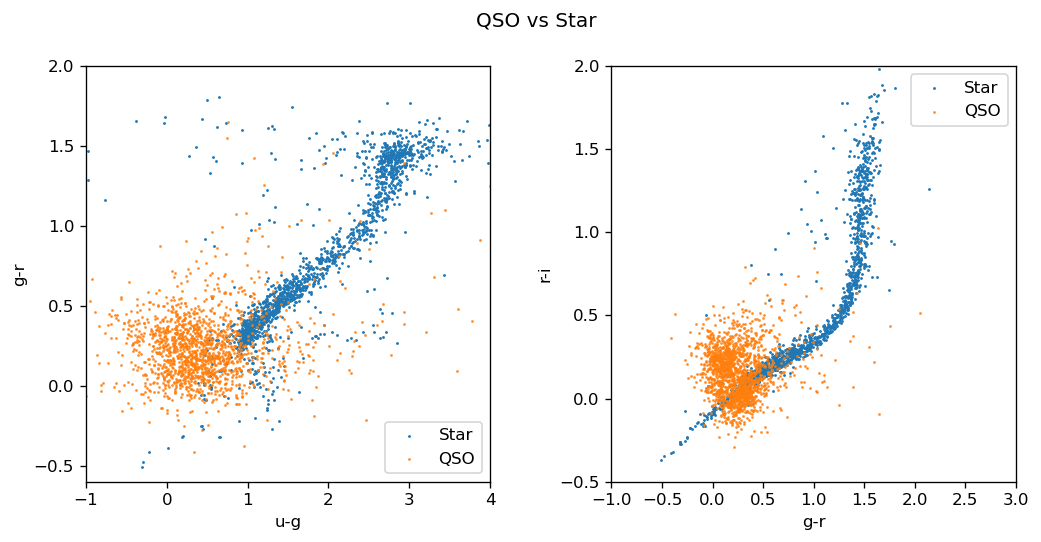

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5), dpi=120)

## u-g vs g-r
axes[0].scatter(star['stdColor_0'][::50], star['stdColor_1'][::50], 
            s=.5, label='Star')
axes[0].scatter(qso['stdColor_0'][::50], qso['stdColor_1'][::50], 
            s=.5, label='QSO', alpha=0.8)
axes[0].set_xlim(-1, 4)
axes[0].set_ylim(-0.6, 2)
axes[0].set_xlabel('u-g')
axes[0].set_ylabel('g-r')
axes[0].legend()

## g-r vs r-i
axes[1].scatter(star['stdColor_1'][::50], star['stdColor_2'][::50], 
            s=.5, label='Star')
axes[1].scatter(qso['stdColor_1'][::50], qso['stdColor_2'][::50], 
            s=.5, label='QSO', alpha=0.8)
axes[1].set_xlim(-1, 3)
axes[1].set_ylim(-0.5, 2)
axes[1].set_xlabel('g-r')
axes[1].set_ylabel('r-i')
axes[1].legend()

# common plot configs
plt.suptitle('QSO vs Star')
plt.subplots_adjust(wspace=0.3)

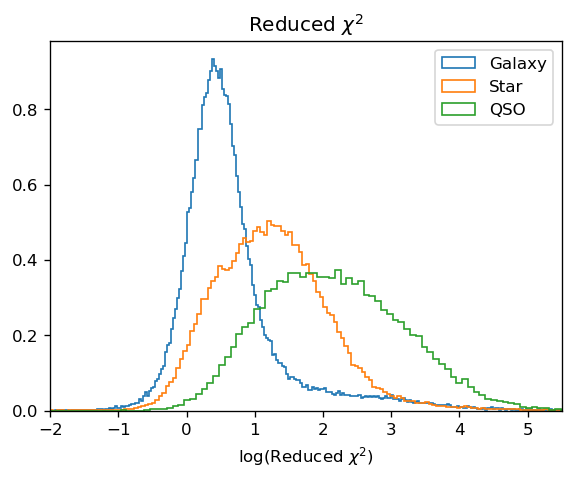

In [22]:
#plot2 hi squared distribution of a variable:

feat_col = 'lcNonPeriodic[22]_g'
fig = plt.figure(figsize=(5.5, 4), dpi=120)
_ = plt.hist(np.log(galaxy[feat_col]), 
             bins='fd', histtype='step', density=True, label='Galaxy')
_ = plt.hist(np.log(star[feat_col]), 
             bins='fd', histtype='step',density=True, label='Star')
_ = plt.hist(np.log(qso[feat_col]), 
             bins='fd', histtype='step',density=True, label='QSO')

plt.legend()
plt.xlabel('log(Reduced $\chi^{2}$)')
plt.title('Reduced $\chi^{2}$')
_ = plt.xlim(-2, 5.5)

In [ ]:
#FORCEDSOURCE TABLE (plots, more info)

In [23]:
forced_source_df.head(5)

,objectId,mjd,psMag,psMagErr,flags,psFlux,psFluxErr,psDiffFlux,psDiffFluxErr,filter
0,1377887,52959.13,23.269028,0.442568,9007199422513169,1584.230835,759.312988,839.39703,1350.93301,0
1,1377887,54379.29,NaN,NaN,9007199397347585,-210.056396,1103.294067,-954.89032,1570.26164,0
2,1377887,53674.19,23.163357,0.562635,9007199397380353,1773.329224,1049.915405,1028.49530,1533.22740,0
3,1377887,53352.08,23.761757,0.668242,9007199388958721,875.497925,808.758972,130.66400,1379.33134,0
4,1377887,53638.28,24.019226,1.067474,9007199388960001,585.692871,1122.401855,-159.14105,1583.74548,0


In [24]:
forced_source_df.describe()

,mjd,psMag,psMagErr,flags,psFlux,psFluxErr,psDiffFlux,psDiffFluxErr,filter
count,4.897424e+07,4.844275e+07,4.844275e+07,4.897424e+07,4.897424e+07,4.897424e+07,4.897424e+07,4.897424e+07,4.897424e+07
mean,5.372841e+04,1.986169e+01,1.282612e-01,3.652782e+15,2.615889e+05,5.824307e+03,-3.072548e+03,8.209082e+03,2.000000e+00
std,6.455531e+02,7.120637e+00,1.688666e-01,9.272625e+15,6.750414e+05,1.473942e+04,1.175797e+05,2.061770e+04,1.414214e+00
min,0.000000e+00,9.693362e+00,5.580343e-04,1.000000e+00,-2.502348e+06,1.158031e+02,-3.816851e+07,2.027368e+02,0.000000e+00
25%,5.362319e+04,1.823040e+01,2.186953e-02,2.751464e+11,8.062685e+03,9.696835e+02,-1.975992e+03,1.409592e+03,1.000000e+00
50%,5.399642e+04,2.007173e+01,4.929056e-02,2.752806e+11,3.289082e+04,1.872083e+03,0.000000e+00,2.628688e+03,2.000000e+00
75%,5.406227e+04,2.155775e+01,1.507737e-01,4.503875e+15,1.814162e+05,4.692616e+03,1.950016e+03,6.596556e+03,3.000000e+00
max,5.443340e+04,2.511439e+01,5.971176e+00,3.647916e+17,4.815945e+08,1.524370e+07,4.782366e+08,1.524377e+07,4.000000e+00


In [30]:
forced_source_df.shape, source_df.shape , object_df.shape

((48974245, 10), (1795747, 14), (446487, 384))

In [31]:
# groupby forcedsource table by objectid
fs_gp = forced_source_df.groupby('objectId')

In [35]:
fs_gp.head()

,objectId,mjd,psMag,psMagErr,flags,psFlux,psFluxErr,psDiffFlux,psDiffFluxErr,filter
0,1377887,52959.13,23.269028,0.442568,9007199422513169,1.584231e+03,759.312988,839.39703,1350.93301,0
1,1377887,54379.29,NaN,NaN,9007199397347585,-2.100564e+02,1103.294067,-954.89032,1570.26164,0
2,1377887,53674.19,23.163357,0.562635,9007199397380353,1.773329e+03,1049.915405,1028.49530,1533.22740,0
3,1377887,53352.08,23.761757,0.668242,9007199388958721,8.754979e+02,808.758972,130.66400,1379.33134,0
4,1377887,53638.28,24.019226,1.067474,9007199388960001,5.856929e+02,1122.401855,-159.14105,1583.74548,0
...,...,...,...,...,...,...,...,...,...,...
48652371,0277917,52586.18,18.357262,0.034884,275179896848,1.678826e+05,5396.884277,0.00000,7632.34695,4
48694720,0277004,53669.21,18.212414,0.028142,275280592896,1.918544e+05,4974.777832,0.00000,7035.39825,4
48772035,0275452,54056.22,15.994510,0.023538,275146375168,1.479859e+06,32083.064453,0.00000,45372.30469,4
48949532,0271936,54365.30,16.245630,0.029155,275146506240,1.174279e+06,31533.255859,0.00000,44594.75827,4


In [38]:
#object table is already loaded, I will now plot light curve for random object
# first, select the objects that have time domain data (LC), and create new dataset: lc_objects
lc_cols = [col for col in object_df.columns if 'Periodic' in col]
lc_objects = object_df.dropna(subset=lc_cols, how='all').copy()

In [39]:
lc_objects.head(5)

,ra,dec,psPm_ra,psPm_dec,psParallax,psFlux_u,psFlux_g,psFlux_r,psFlux_i,psFlux_z,psFlux_y,psFluxErr_u,psFluxErr_g,psFluxErr_r,psFluxErr_i,psFluxErr_z,psFluxErr_y,bdFlux_u,bdFlux_g,bdFlux_r,bdFlux_i,bdFlux_z,bdFlux_y,bdFluxErr_u,bdFluxErr_g,bdFluxErr_r,bdFluxErr_i,bdFluxErr_z,bdFluxErr_y,psMag_u,psMag_g,psMag_r,psMag_i,psMag_z,psMag_y,psMagErr_u,psMagErr_g,psMagErr_r,psMagErr_i,psMagErr_z,psMagErr_y,bdMag_u,bdMag_g,bdMag_r,bdMag_i,bdMag_z,bdMag_y,bdMagErr_u,bdMagErr_g,bdMagErr_r,bdMagErr_i,bdMagErr_z,bdMagErr_y,extendedness_u,extendedness_g,extendedness_r,extendedness_i,extendedness_z,extendedness_y,stdColor_0,stdColor_1,stdColor_2,stdColor_3,stdColor_4,stdColorErr_0,stdColorErr_1,stdColorErr_2,stdColorErr_3,stdColorErr_4,class,photoZ_pest,z,flags_u,flags_g,flags_r,flags_i,flags_z,flags_y,spec_fiberid,spec_plate,spec_mjd,lcPeriodic[0]_g,lcPeriodic[0]_r,lcPeriodic[0]_i,lcPeriodic[1]_g,lcPeriodic[1]_r,lcPeriodic[1]_i,lcPeriodic[2]_g,lcPeriodic[2]_r,lcPeriodic[2]_i,lcPeriodic[3]_g,lcPeriodic[3]_r,lcPeriodic[3]_i,lcPeriodic[4]_u,lcPeriodic[4]_g,lcPeriodic[4]_r,lcPeriodic[4]_i,lcPeriodic[4]_z,lcPeriodic[5]_u,lcPeriodic[5]_g,lcPeriodic[5]_r,lcPeriodic[5]_i,lcPeriodic[5]_z,lcPeriodic[6]_u,lcPeriodic[6]_g,lcPeriodic[6]_r,lcPeriodic[6]_i,lcPeriodic[6]_z,lcPeriodic[7]_u,lcPeriodic[7]_g,lcPeriodic[7]_r,lcPeriodic[7]_i,lcPeriodic[7]_z,lcPeriodic[8]_u,lcPeriodic[8]_g,lcPeriodic[8]_r,lcPeriodic[8]_i,lcPeriodic[8]_z,lcPeriodic[9]_u,lcPeriodic[9]_g,lcPeriodic[9]_r,lcPeriodic[9]_i,lcPeriodic[9]_z,lcPeriodic[10]_u,lcPeriodic[10]_g,lcPeriodic[10]_r,lcPeriodic[10]_i,lcPeriodic[10]_z,lcPeriodic[11]_u,lcPeriodic[11]_g,lcPeriodic[11]_r,lcPeriodic[11]_i,lcPeriodic[11]_z,lcPeriodic[12]_u,lcPeriodic[12]_g,lcPeriodic[12]_r,lcPeriodic[12]_i,lcPeriodic[12]_z,lcPeriodic[13]_u,lcPeriodic[13]_g,lcPeriodic[13]_r,lcPeriodic[13]_i,lcPeriodic[13]_z,lcPeriodic[14]_u,lcPeriodic[14]_g,lcPeriodic[14]_r,lcPeriodic[14]_i,lcPeriodic[14]_z,lcPeriodic[15]_u,lcPeriodic[15]_g,lcPeriodic[15]_r,lcPeriodic[15]_i,lcPeriodic[15]_z,lcPeriodic[16]_u,lcPeriodic[16]_g,lcPeriodic[16]_r,lcPeriodic[16]_i,lcPeriodic[16]_z,lcPeriodic[17]_u,lcPeriodic[17]_g,lcPeriodic[17]_r,lcPeriodic[17]_i,lcPeriodic[17]_z,lcPeriodic[18]_u,lcPeriodic[18]_g,lcPeriodic[18]_r,lcPeriodic[18]_i,lcPeriodic[18]_z,lcPeriodic[19]_u,lcPeriodic[19]_g,lcPeriodic[19]_r,lcPeriodic[19]_i,lcPeriodic[19]_z,lcPeriodic[20]_u,lcPeriodic[20]_g,lcPeriodic[20]_r,lcPeriodic[20]_i,lcPeriodic[20]_z,lcPeriodic[21]_u,lcPeriodic[21]_g,lcPeriodic[21]_r,lcPeriodic[21]_i,lcPeriodic[21]_z,lcPeriodic[22]_u,lcPeriodic[22]_g,lcPeriodic[22]_r,lcPeriodic[22]_i,lcPeriodic[22]_z,lcPeriodic[23]_u,lcPeriodic[23]_g,lcPeriodic[23]_r,lcPeriodic[23]_i,lcPeriodic[23]_z,lcPeriodic[24]_u,lcPeriodic[24]_g,lcPeriodic[24]_r,lcPeriodic[24]_i,lcPeriodic[24]_z,lcPeriodic[25]_u,lcPeriodic[25]_g,lcPeriodic[25]_r,lcPeriodic[25]_i,lcPeriodic[25]_z,lcPeriodic[26]_u,lcPeriodic[26]_g,lcPeriodic[26]_r,lcPeriodic[26]_i,lcPeriodic[26]_z,lcPeriodic[27]_u,lcPeriodic[27]_g,lcPeriodic[27]_r,lcPeriodic[27]_i,lcPeriodic[27]_z,lcPeriodic[28]_u,lcPeriodic[28]_g,lcPeriodic[28]_r,lcPeriodic[28]_i,lcPeriodic[28]_z,lcPeriodic[29]_u,lcPeriodic[29]_g,lcPeriodic[29]_r,lcPeriodic[29]_i,lcPeriodic[29]_z,lcPeriodic[30]_u,lcPeriodic[30]_g,lcPeriodic[30]_r,lcPeriodic[30]_i,lcPeriodic[30]_z,lcPeriodic[31]_u,lcPeriodic[31]_g,lcPeriodic[31]_r,lcPeriodic[31]_i,lcPeriodic[31]_z,lcPeriodic[32]_u,lcPeriodic[32]_g,lcPeriodic[32]_r,lcPeriodic[32]_i,lcPeriodic[32]_z,lcNonPeriodic[0]_u,lcNonPeriodic[0]_g,lcNonPeriodic[0]_r,lcNonPeriodic[0]_i,lcNonPeriodic[0]_z,lcNonPeriodic[1]_u,lcNonPeriodic[1]_g,lcNonPeriodic[1]_r,lcNonPeriodic[1]_i,lcNonPeriodic[1]_z,lcNonPeriodic[2]_u,lcNonPeriodic[2]_g,lcNonPeriodic[2]_r,lcNonPeriodic[2]_i,lcNonPeriodic[2]_z,lcNonPeriodic[3]_u,lcNonPeriodic[3]_g,lcNonPeriodic[3]_r,lcNonPeriodic[3]_i,lcNonPeriodic[3]_z,lcNonPeriodic[4]_u,lcNonPeriodic[4]_g,lcNonPeriodic[4]_r,lcNonPeriodic[4]_i,lcNonPeriodic[4]_z,lcNonPeriodic[5]_u,lcNonPeriodic[5]_g,lcNonPeriodic[5]_r,lcNonPeri

In [40]:
lc_objects.shape

(212425, 384)

In [52]:
#PLOT of a LC using flux (for a first object in lc_object table -> id= 0271388 ):
# get the light curve
demo_lc = fs_gp.get_group('0271388')

# put into five different bands
demo_lc_bands = {}
for i, b in enumerate('ugriz'):
    demo_lc_bands[b] = demo_lc[demo_lc['filter'] == i]

In [154]:
demo_lc_bands.keys()

dict_keys(['u', 'g', 'r', 'i', 'z'])

In [155]:
demo_lc_bands['z']

,objectId,mjd,psMag,psMagErr,flags,psFlux,psFluxErr,psDiffFlux,psDiffFluxErr,filter
48974081,0271388,52522.32,15.215261,0.015578,275146375168,3033338.25,43523.054688,39599.50,66258.21686,4
48974082,0271388,52577.21,15.236651,0.015507,275297370624,2974163.50,42477.976562,-19575.25,65576.47095,4
48974083,0271388,52586.21,15.229529,0.018119,275146375168,2993738.75,49958.933594,0.00,70652.60141,4
48974084,0271388,52558.32,15.200903,0.019343,275297370624,3073719.75,54760.019531,79980.75,74125.26483,4
48974085,0271388,52931.22,15.231834,0.015897,72057869318520832,2987390.75,43741.226562,-6348.25,66401.73111,4
48974086,0271388,52935.22,15.263719,0.015407,72057869335298560,2900934.25,41165.808594,-92804.75,64734.21653,4
48974087,0271388,52910.29,15.264101,0.012886,72057869318520832,2899913.50,34417.804688,-93825.25,60666.96186,4
48974088,0271388,52959.16,15.295222,0.016298,72057869318520832,2817971.25,42299.527344,-175767.75,65461.01965,4
48974089,0271388,52963.14,15.209379,0.015959,72057869184303104,3049817.25,44829.195312,56078.25,67123.40687,4
48974090,0271388,53352.11,15.270700,0.016555,72057869184303104,2882342.00,43948.535156,-111397.00,66538.47637,4


In [156]:
demo_lc

,objectId,mjd,psMag,psMagErr,flags,psFlux,psFluxErr,psDiffFlux,psDiffFluxErr,filter
31635389,0271388,52522.32,20.310766,0.068685,275154764288,2.627658e+04,1663.454590,203.28516,2314.76567,0
31635390,0271388,52577.21,20.227154,0.048676,275280592896,2.838148e+04,1273.161377,2308.18555,2052.31546,0
31635391,0271388,52586.21,20.346828,0.055520,275146375168,2.541754e+04,1300.717896,-655.75195,2069.52310,0
31635392,0271388,52558.32,20.376238,0.069449,275280592896,2.473780e+04,1583.588989,-1335.49023,2258.05511,0
31635393,0271388,52931.22,20.389921,0.065834,275288982016,2.442772e+04,1482.380493,-1645.56641,2188.26664,0
...,...,...,...,...,...,...,...,...,...,...
48974135,0271388,54357.28,15.252100,0.022464,275146375168,2.932144e+06,60667.660156,-61594.75000,78590.45442,4
48974136,0271388,54020.26,15.253433,0.015162,275297370624,2.928545e+06,40895.753906,-65194.25000,64562.82031,4
48974137,0271388,54422.24,15.220728,0.017914,275297501184,3.018106e+06,49796.332031,24367.00000,70537.71807,4
48974138,0271388,54413.23,15.208203,0.019763,275280723968,3.053123e+06,55573.765625,59384.00000,74728.43125,4


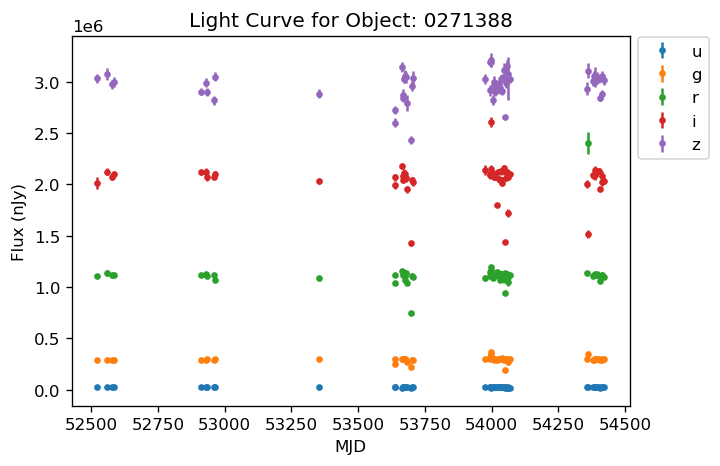

In [45]:
fig = plt.figure(figsize=(6, 4), dpi=120)
for b in demo_lc_bands:
    plt.errorbar(demo_lc_bands[b].mjd, demo_lc_bands[b].psFlux, 
                 demo_lc_bands[b].psFluxErr, fmt='.', label=b)
plt.xlabel('MJD')
plt.ylabel('Flux (nJy)')
plt.title('Light Curve for Object: 0271388')
plt.legend(bbox_to_anchor=(1, 1.02), loc=2)

In [ ]:
#PLOT of a LC using magnitude:

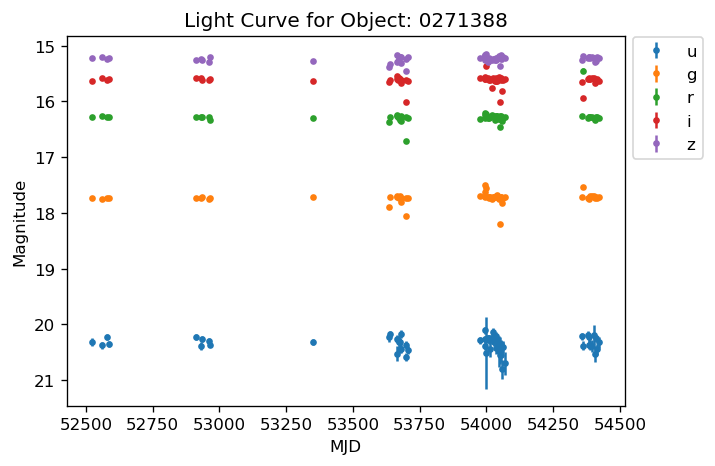

In [46]:
fig = plt.figure(figsize=(6, 4), dpi=120)
for b in demo_lc_bands:
    plt.errorbar(demo_lc_bands[b].mjd, demo_lc_bands[b].psMag, 
                 demo_lc_bands[b].psMagErr, fmt='.', label=b)
plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.title('Light Curve for Object: 0271388')
plt.legend(bbox_to_anchor=(1, 1.02), loc=2)
plt.gca().invert_yaxis()

In [48]:
object_df.shape, lc_objects.shape #approximately 2 times less objects than initially

((446487, 384), (212425, 384))

In [ ]:
#TASK 2: Extraction of n light curves:

In [105]:
def extract(obj_df: pd.DataFrame, lc_df: pd.DataFrame, N: int = 100) -> pd.DataFrame:
    """
    Extract N number of light curves, including all photometric bands (u, g, r, i, z).

    Parameters:
    - obj_df (pd.DataFrame): Pandas DataFrame containing objects from which will be extraced. 
    Provide dataframe of periodic objects.
    - lc_df (pd.DataFrame): Pandas DataFrame containing the light curves.
    - N (int, optional): Number of light curves to return. Defaults to 100 if not specified.

    Returns:
    pd.DataFrame: A sampled DataFrame containing N light curves across all photometric bands.
    """
    import random
    index_list = obj_df.index.tolist()
    obj_subsample = random.sample(index_list, N)

    light_curves = pd.DataFrame()
    
    for i in obj_subsample:
        lc = lc_df.get_group(i)
        light_curves = pd.concat([light_curves, lc], ignore_index=True)

    return light_curves

In [107]:
# Extracting light curves

curves = extract(lc_objects, fs_gp, N = 5000)

In [108]:
curves

,objectId,mjd,psMag,psMagErr,flags,psFlux,psFluxErr,psDiffFlux,psDiffFluxErr,filter
0,0310803,53663.38,18.227766,0.055108,275280592896,179026.203125,9086.872070,2786.01562,9593.62270,0
1,0310803,52908.41,18.272854,0.023319,275146375168,171743.609375,3688.679932,-4496.57812,4803.40593,0
2,0310803,52261.26,18.194933,0.031748,275146375168,184522.921875,5395.674805,8282.71875,6211.25225,0
3,0310803,52912.39,18.242887,0.026237,268468240,176550.078125,4266.386719,309.87500,5260.07647,0
4,0310803,51818.40,18.241529,0.017722,275146375168,176771.093750,2885.338135,530.90625,4218.00024,0
...,...,...,...,...,...,...,...,...,...,...
1145090,0314710,53997.45,18.742857,0.033447,275280592896,117665.218750,3628.642334,-1054.81250,5578.79546,4
1145091,0314710,53635.39,18.792933,0.036219,275146375168,112355.695312,3752.481934,-6364.33594,5660.12675,4
1145092,0314710,54396.31,18.855505,0.084626,275146375168,106055.937500,8277.323242,-12664.09375,9298.92434,4
1145093,0314710,54348.43,18.663322,0.039704,275213484104,126617.515625,4634.533691,7897.48438,6279.71463,4


In [109]:
len(curves['objectId'].unique())

5000

In [110]:
curves_u = curves[curves['filter'] == 0]
curves_g = curves[curves['filter'] == 1]
curves_r = curves[curves['filter'] == 2]
curves_i = curves[curves['filter'] == 3]
curves_z = curves[curves['filter'] == 4]

<Axes: xlabel='mjd', ylabel='psFlux'>

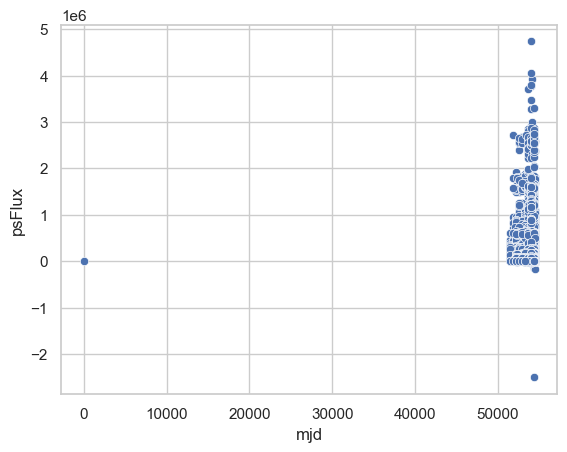

In [160]:
sns.scatterplot(data=curves_u,
                x="mjd",
                y="psFlux")

In [ ]:
#TASK 3 visualization

In [112]:

def plot_band(df: pd.DataFrame):
    """
    Plots the lightcurves from the dataframe that is filtereted by a specific band.

    Parameters:
    - df (pd.DataFrame): Pandas DataFrame containing "mjd" and "psFlux" that has been filtered on a specific band.

    Returns:
    fig that is a matplotlib figure of a

    """
    fig, ax = plt.subplots()

    def using_datashader(ax, x, y):

        df = pd.DataFrame(dict(x=x, y=y))
        dsartist = dsshow(
        df,
        ds.Point("x", "y"),
        ds.count(),
        vmin=0,
        vmax=35,
        norm="linear",
        aspect="auto",
        ax=ax,
        )

    using_datashader(ax, df["mjd"], df['psMag'])
    ax.set_title("Light curve plot")
    ax.set_xlabel("MJD")
    ax.set_ylabel("Magnitude")
    plt.show()
    return fig

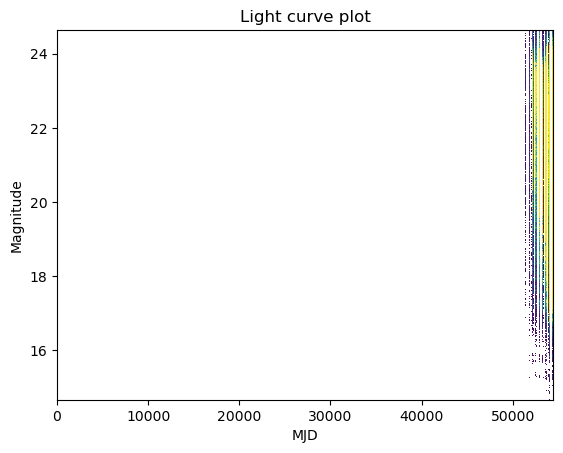

In [132]:
u_band_plot = plot_band(curves_u)

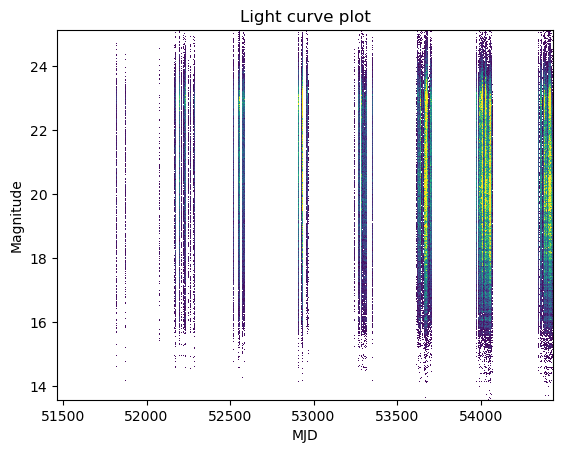

In [134]:
g_band_plot = plot_band(curves_g)

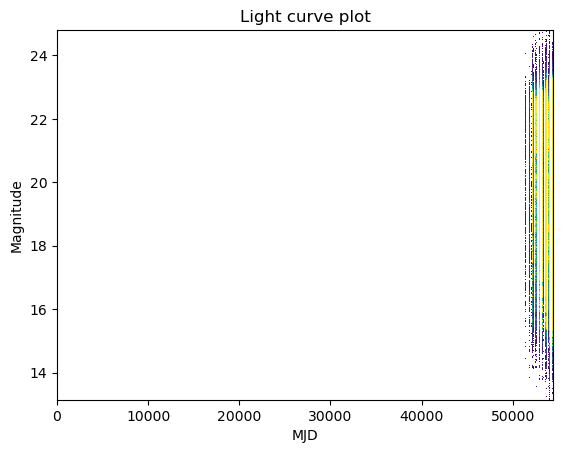

In [135]:
r_band_plot = plot_band(curves_r)

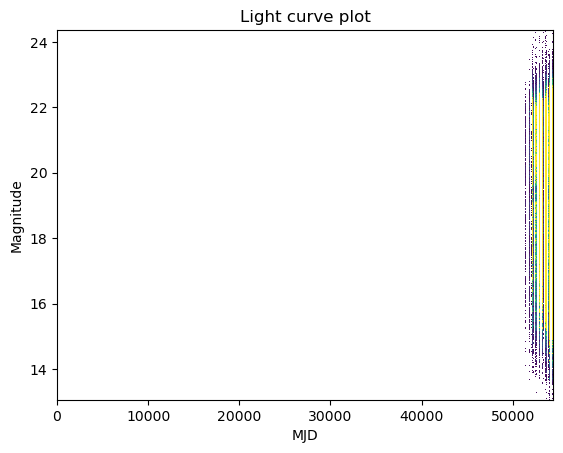

In [136]:
i_band_plot = plot_band(curves_i)

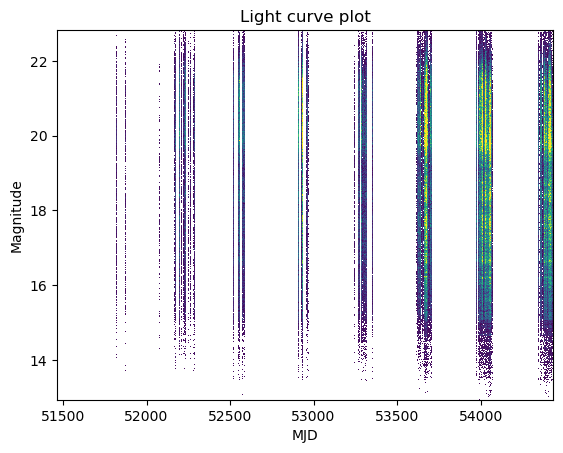

In [139]:
z_band_plot = plot_band(curves_z)

In [ ]:
#TASK 4: Creating info sheet

In [144]:
def compute_sampling_intervals(df):
    df_sorted = df.sort_values(by="mjd").reset_index(drop=True)
    df_sorted["time_diff"] = df_sorted["mjd"].diff()
    mean_sampling = df_sorted["time_diff"].mean()
    median_sampling = df_sorted["time_diff"].median()
    return mean_sampling, median_sampling

def compute_fvar(curves_df: pd.DataFrame) -> float:
    mean_flux = curves_df["psFlux"].mean()
    variance = ((curves_df["psFlux"] - mean_flux) ** 2).sum() / len(curves_df)
    mean_squared_error = curves_df["psFluxErr"] ** 2 / len(curves_df)
    
    expression_inside_sqrt = variance - mean_squared_error.mean()
    
    if expression_inside_sqrt >= 0:
        fvar = np.sqrt(expression_inside_sqrt) / mean_flux
    else:
        fvar = np.nan
    
    return fvar

def info_sheet(df):
    results = []
    
    for obj_id in df["objectId"].unique():
        subset_df = df[df["objectId"] == obj_id].copy()
        
        min_psMag = subset_df["psMag"].min()
        max_psMag = subset_df["psMag"].max()
        median_psMag = subset_df["psMag"].median()
        mean_psMag = subset_df["psMag"].mean()
        
        num_points = len(subset_df)
        mean_sampling, median_sampling = compute_sampling_intervals(subset_df)
        
        frac_var = compute_fvar(subset_df[["psFlux", "psFluxErr"]])
        
        # Recalculate time_diff after sorting by 'mjd'
        subset_df = subset_df.sort_values(by="mjd")
        subset_df["time_diff"] = subset_df["mjd"].diff()
        
        # Compute IQR for time differences
        Q1 = subset_df["time_diff"].quantile(0.25)
        Q3 = subset_df["time_diff"].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate number of gaps based on median + 1.5 * IQR
        threshold = median_sampling + 1.5 * IQR
        num_gaps = subset_df.loc[subset_df["time_diff"] > threshold, "time_diff"].count()
        results.append([obj_id, min_psMag, max_psMag, median_psMag, mean_psMag, 
                        num_points, mean_sampling, median_sampling, frac_var, num_gaps])
    
    stats_df = pd.DataFrame(results, columns=["objectId", "min_Mag", "max_Mag", 
                                              "median_Mag", "mean_Mag", "number_of_points", 
                                              "mean_sampling", "median_sampling", "frac_var", 
                                              "number_of_gaps"])
    
    return stats_df

In [148]:
# Getting info sheets for every band 
#predugo trajalo

info_sheet_u = info_sheet(curves_u)
info_sheet_g = info_sheet(curves_g)
info_sheet_r = info_sheet(curves_r)
info_sheet_i = info_sheet(curves_i)
info_sheet_z = info_sheet(curves_z) 

# Save each DataFrame as a parquet file
#info_sheet_u.to_parquet("./data/info_sheet_u.parquet")
#info_sheet_g.to_parquet("./data/info_sheet_g.parquet")
#info_sheet_r.to_parquet("./data/info_sheet_r.parquet")
#info_sheet_i.to_parquet("./data/info_sheet_i.parquet")
#info_sheet_z.to_parquet("./data/info_sheet_z.parquet")

KeyboardInterrupt: 

In [150]:
info_sheet_u.head(10)

,objectId,min_Mag,max_Mag,median_Mag,mean_Mag,number_of_points,mean_sampling,median_sampling,frac_var,number_of_gaps
0,0310803,17.853870,19.454540,18.244795,18.292923,77,34.407368,3.995,0.146705,14
1,0790373,21.572454,24.072399,22.810852,22.821543,32,82.228065,10.960,1.086572,6
2,0742485,21.880121,23.728954,22.986748,22.998190,27,86.379231,10.480,0.566855,5
3,1424168,21.174469,24.453190,23.366623,23.214306,32,60.382581,12.000,1.423541,4
4,0455840,20.479391,23.425686,21.076271,21.112261,45,51.133409,4.985,0.238370,6
5,1464577,20.117540,21.959225,20.713514,20.716621,71,42.413429,3.970,0.224265,12
6,0463729,20.226671,21.515047,20.920666,20.898064,72,31.871972,4.950,0.217840,12
7,0311049,20.333450,22.474121,21.429838,21.453466,65,39.829375,4.485,0.315602,12
8,0293109,18.184137,21.229769,18.574200,18.634890,58,39.506140,3.020,0.152057,9
9,0334013,22.189899,24.374138,23.557507,23.406584,28,83.034444,13.000,-4.994703,6


In [ ]:
#TASK 5: plots of info sheet vars.

In [152]:
def plot_distribution(df: pd.DataFrame):
    """
    Plot distribution plots for all columns of the provided DataFrame using Seaborn.
    
    Parameters:
    - df (DataFrame): DataFrame containing data to plot.
    """
    
    # Replace infinite values with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Calculate number of rows and columns for subplots
    num_cols = 2
    num_rows = (len(df.columns) + num_cols - 1) // num_cols
    
    # Create a figure and set of subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))
    
    # Flatten the axes array for iteration
    axes = axes.flatten()
    
    # Iterate through each column and create a distribution plot
    for idx, column in enumerate(df.columns):
        sns.histplot(df[column].dropna(), kde=True, ax=axes[idx])  # Drop NaN values for plotting
        axes[idx].set_title(f'Distribution of {column}')
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Frequency')

    # Remove any unused subplots
    for i in range(len(df.columns), num_rows * num_cols):
        fig.delaxes(axes[i])

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

    return fig

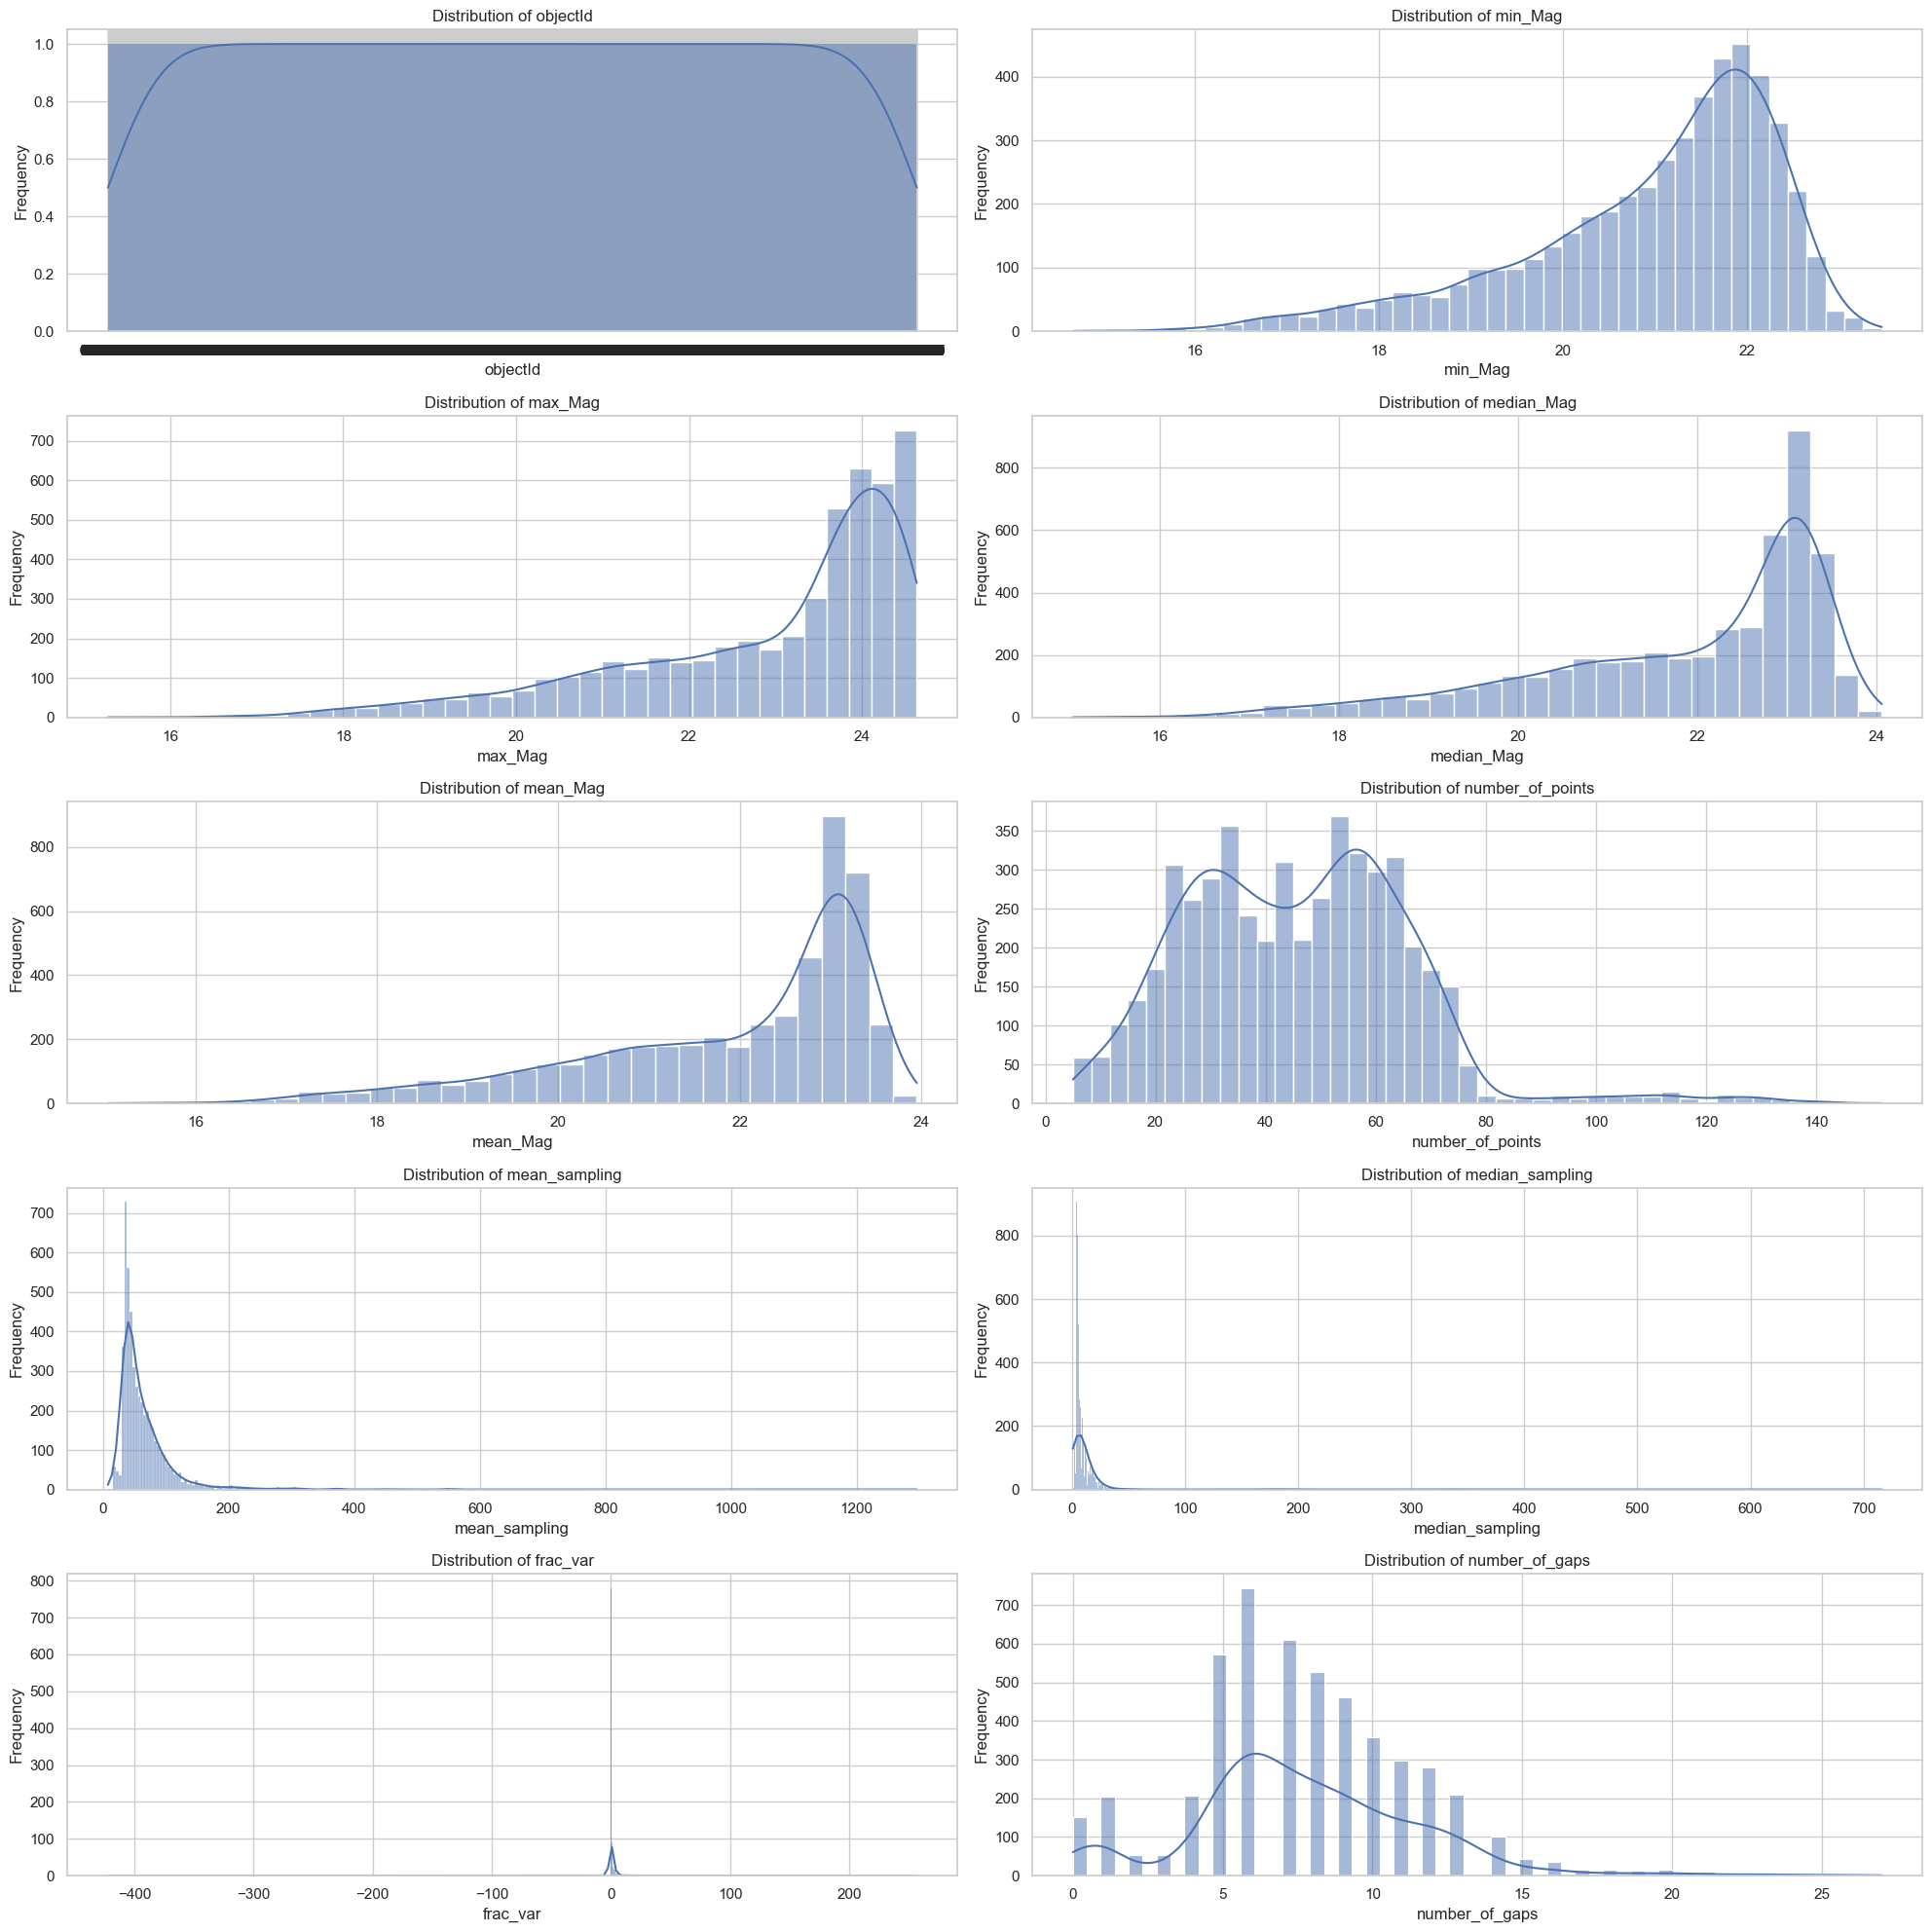

In [153]:
u_band_distributions = plot_distribution(info_sheet_u)

In [ ]:
# robust outlier detection method 